In [1]:
from kubetools import get_all, delete, top
from subprocess import check_output
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
# Grab all pods + pod resources information, merge into one df
df_top = top('pod')
df_get = get_all('pod')
df = pd.merge(df_top, df_get, on='name')

In [2]:
# Convert age to hours and sort
df['age'] /= 60.0
df = df.sort_values(['age', 'cpu'], ascending=False)

# Determine if this is a user/prod/etc pod
df['kind'] = df['name'].map(lambda a: a.split('-')[0])

# List pods per node

In [3]:
df['node'].unique()

array([u'gke-prod-a-ssd-pool-32-134a959a-z2hg',
       u'gke-prod-a-ssd-pool-32-134a959a-bmsw',
       u'gke-prod-a-ssd-pool-32-134a959a-nhf6'], dtype=object)

# CPU usage by pod

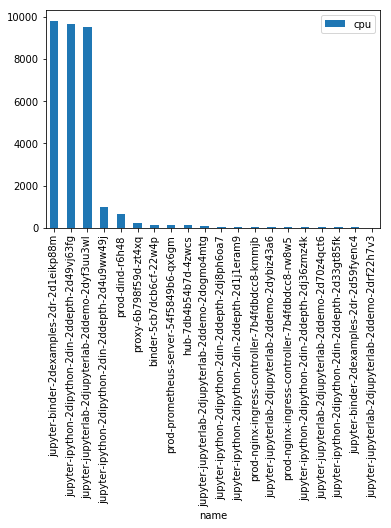

In [4]:
df.sort_values('cpu', ascending=False).head(20).plot.bar(x='name', y='cpu')

# Distribution of pod age

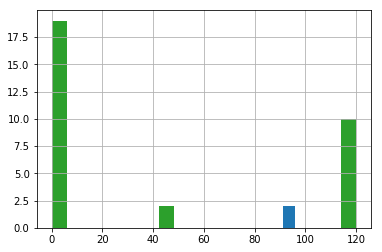

In [8]:
fig, ax = plt.subplots()
for node, vals in df.groupby('node'):
    vals['age'].hist(bins=20, ax=ax)

In [12]:
df['status'].unique()

array(['Running', 'Pending', None], dtype=object)

## Delete lost pods

In [17]:
delete_pods = df.query('kind == "jupyter" and age > 4')
for nm in delete_pods['name'].values:
    delete(nm)

Deleted pod: jupyter-jupyterlab-2djupyterlab-2ddemo-2drr3ifp8h
Deleted pod: jupyter-jupyterlab-2djupyterlab-2ddemo-2dx4huolum
Deleted pod: jupyter-jupyterlab-2djupyterlab-2ddemo-2d6ioaj9rs
Deleted pod: jupyter-jupyterlab-2djupyterlab-2ddemo-2dmchamzoc
Deleted pod: jupyter-jupyterlab-2djupyterlab-2ddemo-2d3hdd4m24
